<a href="https://colab.research.google.com/github/pahwa1902/LearMachineLearning/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive"

'Colab Notebooks'
'Intro to Probability and Stochastic Processes by Dharmaraja.pdf'
 jkt.gslides
 ml-25m
 ppt5.ppt
 shobhitandchandrakant.pptx
 Stocks
'Untitled presentation.gslides'
 Week4-KNN.gslides


In [0]:
!ls "/content/drive/My Drive/Stocks"


ADANIPOWER.csv	AXISBANK.csv	CENTURYPLY.csv	EXIDEIND.csv	IDFC.csv
AJANTPHARM.csv	BAJAJELEC.csv	CIPLA.csv	FORTIS.csv	IRCON.csv
AMARAJABAT.csv	BERGEPAINT.csv	CUMMINSIND.csv	GAIL.csv	ITDC.csv
APOLLOTYRE.csv	BOMDYEING.csv	DHFL.csv	GMRINFRA.csv	JETAIRWAYS.csv
ASHOKA.csv	BPCL.csv	DRREDDY.csv	GUJALKALI.csv	MARUTI.csv
ASIANPAINT.csv	CASTROLIND.csv	EICHERMOT.csv	HINDUNILVR.csv	RELIANCE.csv


In [0]:
a = !ls "/content/drive/My Drive/Stocks"


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import math as mt
from sklearn.cluster import KMeans

In [0]:
data = []
for i in a:
  data.append(i.split('.csv'))
 

In [0]:
data_csv=[]
columns = []
pct_columns = []
for i in data:
  for j in range(len(i)-1):
    b = re.sub('\t','',i[j])
    data_stock = pd.read_csv('/content/drive/My Drive/Stocks/'+b+'.csv')
    data_csv.append(data_stock['Close Price'])
    columns.append(b)
    pct_columns.append(b+'_pct_change')


In [0]:
data_clustering = pd.DataFrame(columns=columns)

In [0]:
columns_list = data_clustering.columns.tolist()
for i in range(len(columns_list)):
  data_clustering[columns[i]] = data_csv[i]

In [0]:
data_clustering.reindex(columns=data_clustering.columns.tolist()+pct_columns)

,ADANIPOWER,AXISBANK,CENTURYPLY,EXIDEIND,IDFC,AJANTPHARM,BAJAJELEC,CIPLA,FORTIS,IRCON,AMARAJABAT,BERGEPAINT,CUMMINSIND,GAIL,ITDC,APOLLOTYRE,BOMDYEING,DHFL,GMRINFRA,JETAIRWAYS,ASHOKA,BPCL,DRREDDY,GUJALKALI,MARUTI,ASIANPAINT,CASTROLIND,EICHERMOT,HINDUNILVR,RELIANCE,ADANIPOWER_pct_change,AXISBANK_pct_change,CENTURYPLY_pct_change,EXIDEIND_pct_change,IDFC_pct_change,AJANTPHARM_pct_change,BAJAJELEC_pct_change,CIPLA_pct_change,FORTIS_pct_change,IRCON_pct_change,AMARAJABAT_pct_change,BERGEPAINT_pct_change,CUMMINSIND_pct_change,GAIL_pct_change,ITDC_pct_change,APOLLOTYRE_pct_change,BOMDYEING_pct_change,DHFL_pct_change,GMRINFRA_pct_change,JETAIRWAYS_pct_change,ASHOKA_pct_change,BPCL_pct_change,DRREDDY_pct_change,GUJALKALI_pct_change,MARUTI_pct_change,ASIANPAINT_pct_change,CASTROLIND_pct_change,EICHERMOT_pct_change,HINDUNILVR_pct_change,RELIANCE_pct_change
0,30.25,500.10,266.65,245.80,63.70,1633.50,341.15,569.00,205.25,415.3,933.40,259.5,1066.05,414.00,650.15,231.90,82.20,431.40,17.55,527.50,216.05,727.85,2675.80,457.35,6823.90,1148.05,449.85,28930.60,983.25,1344.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32.85,501.50,266.10,244.70,64.25,1634.25,347.00,565.60,207.90,427.0,924.70,261.5,1047.75,411.40,636.70,234.40,83.40,1009.90,17.40,534.15,214.90,733.30,2724.10,455.25,6953.95,1142.85,443.00,29362.50,1000.40,1356.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.10,502.80,264.85,243.20,63.35,1654.35,349.85,562.35,205.90,421.4,937.70,260.9,1016.45,408.30,626.75,237.35,82.25,1055.20,17.30,528.90,217.00,727.45,2736.90,472.65,6958.20,1154.95,439.55,29093.55,1009.40,1353.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31.90,492.00,260.35,239.85,61.50,1633.40,334.10,560.10,196.85,407.1,912.10,254.1,1054.45,404.75,604.65,232.65,78.95,1070.00,16.75,522.70,209.65,714.90,2678.95,461.85,6831.05,1151.35,433.95,28357.30,990.25,1327.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32.40,501.70,254.05,238.15,61.15,1670.25,336.20,564.95,203.55,399.8,895.75,247.8,972.95,401.05,594.30,234.65,77.15,1050.00,16.95,520.40,206.25,702.45,2656.45,455.35,6790.55,1123.15,437.10,27936.05,1008.00,1318.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,41.50,747.45,163.15,212.65,37.75,1051.40,557.75,564.50,136.35,NaN,643.10,304.7,703.15,340.75,254.30,195.20,121.45,1090.05,16.00,127.30,118.10,390.35,2907.45,545.85,6710.00,1412.80,148.95,20349.90,1668.90,1384.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,41.35,741.85,161.30,208.35,37.10,1057.95,534.45,563.35,135.20,NaN,636.00,303.7,700.10,337.50,251.95,191.75,119.35,1116.17,15.85,131.35,115.45,378.85,2920.60,522.90,6709.65,1387.80,148.70,20353.20,1697.50,1343.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,40.95,735.50,160.50,209.80,37.60,1064.40,531.85,557.95,133.60,NaN,635.55,302.3,700.75,340.40,246.25,185.30,117.75,448.45,16.05,147.40,115.30,379.80,2942.45,510.10,6702.00,1385.70,149.90,20336.55,1688.70,1299.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,41.45,731.00,160.50,210.20,37.60,1068.35,540.90,558.00,133.00,NaN,634.90,301.6,699.85,341.55,251.15,190.95,117.05,1031.15,16.10,151.75,117.45,368.05,2900.50,505.05,6650.15,1354.20,146.75,20360.90,1703.75,1256.45,

In [0]:
for i in range(len(columns)):
  data_clustering[columns[i]+'_pct_change'] = data_clustering[columns[i]].pct_change()
  data_clustering[columns[i]+'_pct_change'].iloc[0] = 0

In [0]:
average_return = {}
for i in range(len(columns)):
  average_return[columns[i]] = (data_clustering[columns[i]+'_pct_change'].sum()/len(data_clustering))*252


In [0]:
volatility={}
for i in range(len(columns)):
  volatility[columns[i]] = (data_clustering[columns[i]].std(axis=0))*mt.sqrt(252)

In [0]:
volatility_values = [value for key,value in volatility.items()]
average_returns = [value for key,value in average_return.items()]

In [0]:
return_volatility = pd.DataFrame({'Return':average_returns,'Volatility':volatility_values,'Stock':columns})

In [0]:
wcss = []
X = return_volatility.iloc[:,[0,1]]
for i in range(1,11):
  kmeanss = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeanss.fit(X)
  wcss.append(kmeanss.inertia_)

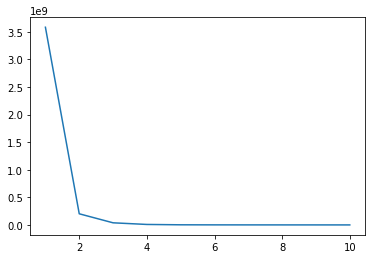

In [35]:
plt.plot(range(1,11),wcss)

In [0]:
kmeanns = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means = kmeanns.fit_predict(X)

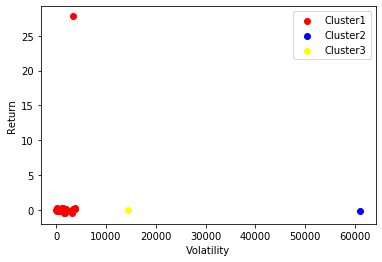

In [46]:
plt.scatter(X.iloc[y_means==0,1],X.iloc[y_means==0,0],color='red',label='Cluster1')
plt.scatter(X.iloc[y_means==1,1],X.iloc[y_means==1,0],color='blue',label='Cluster2')
plt.scatter(X.iloc[y_means==2,1],X.iloc[y_means==2,0],color='yellow',label='Cluster3')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()